## Filtering Examples

In [116]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import random
import xrft
import scipy

## Simple Example

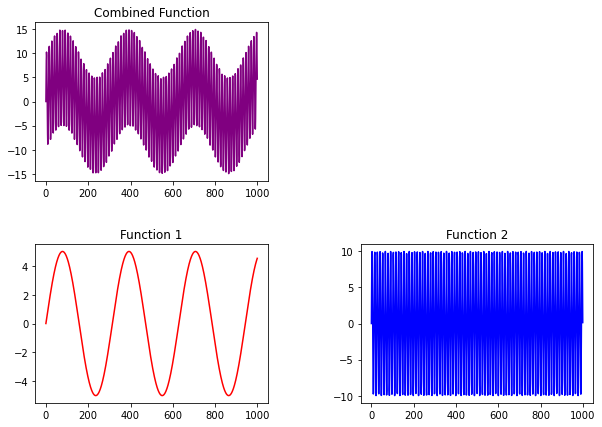

In [67]:
points = 1000
x = np.arange(points)
plt.figure(figsize=(10,7))

a1, k1 = (5,20)
a2, k2 = (10,500)

y1 = np.sin(k1*(x/points))*a1
y2 = np.sin(k2*(x/points))*a2
yt = y1+y2

plt.subplot(2,2,1)
plt.plot(x, yt, color='purple')
plt.title("Combined Function")

plt.subplot(2,2,3)
plt.plot(x,y1, color='r')
plt.title(title1)

plt.subplot(2,2,4)
plt.plot(x,y2, color='blue')
plt.title(title2)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

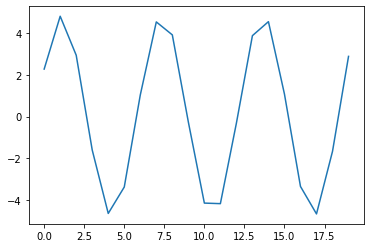

In [96]:
bins = 20
x_binned = np.arange(bins)
bin_means = binned_statistic(x, yt, bins=bins)[0]
plt.plot(x_binned, bin_means)

## Complex Example

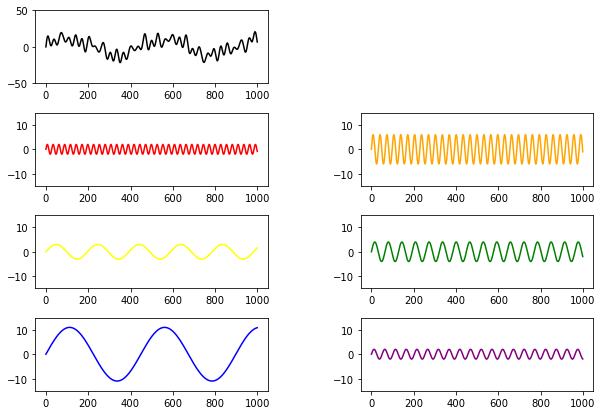

In [97]:
points = 1000
x = np.arange(points)
plt.figure(figsize=(10,7))

#define variables for plot color, amplitude and wavenumber
#define an empty list and function for y
color_li = ['red','orange','yellow','green','blue','purple']
a_li = np.random.randint(1,15,6)
k_li = np.random.randint(10,300,6)
y_li = []
y_funct = 0

#define np arrays for the trendline to work
k = np.array(k_li)
a = np.array(a_li)

#define each sin function, add it to the empty list, and plot it
for n in range(0,6):
    y = np.sin(k[n]*(x/points))*a[n]
    y_li.append(y)

    plt.subplot(4,2,n+3)
    plt.plot(x,y, color=color_li[n])
    plt.ylim(-15,15)

#define the sum of all equations
for y in y_li:
    y_funct =y_funct + y

#plot the sum of all equations
plt.subplot(4,2,1)
plt.plot(x,y_funct, color='black')
plt.ylim(-50,50)
plt.subplots_adjust(wspace=0.4, hspace=0.4) 

(-50.0, 50.0)

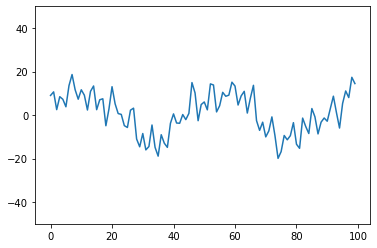

In [100]:
bins = 100
x_binned = np.arange(bins)
bin_means = binned_statistic(x, y_funct, bins=bins)[0]
plt.plot(x_binned, bin_means)
plt.ylim(-50,50)

In [70]:
binned_statistic

<function scipy.stats._binned_statistic.binned_statistic(x, values, statistic='mean', bins=10, range=None)>

## Multiple filtering windows

In [251]:
points = 1000
modes = 10
x = np.linspace(0,2*np.pi,num=points)

a_li = np.random.randint(1,15,modes)
k_li = np.random.randint(10,40,modes)
y_li = np.zeros((points,modes))
y_funct = np.zeros((points,1))

for n in range(0,modes):
    y_li[:,n] = np.sin(2*np.pi*int(k_li[n])*x)*int(a_li[n])

y_funct = y_li.sum(axis=1)

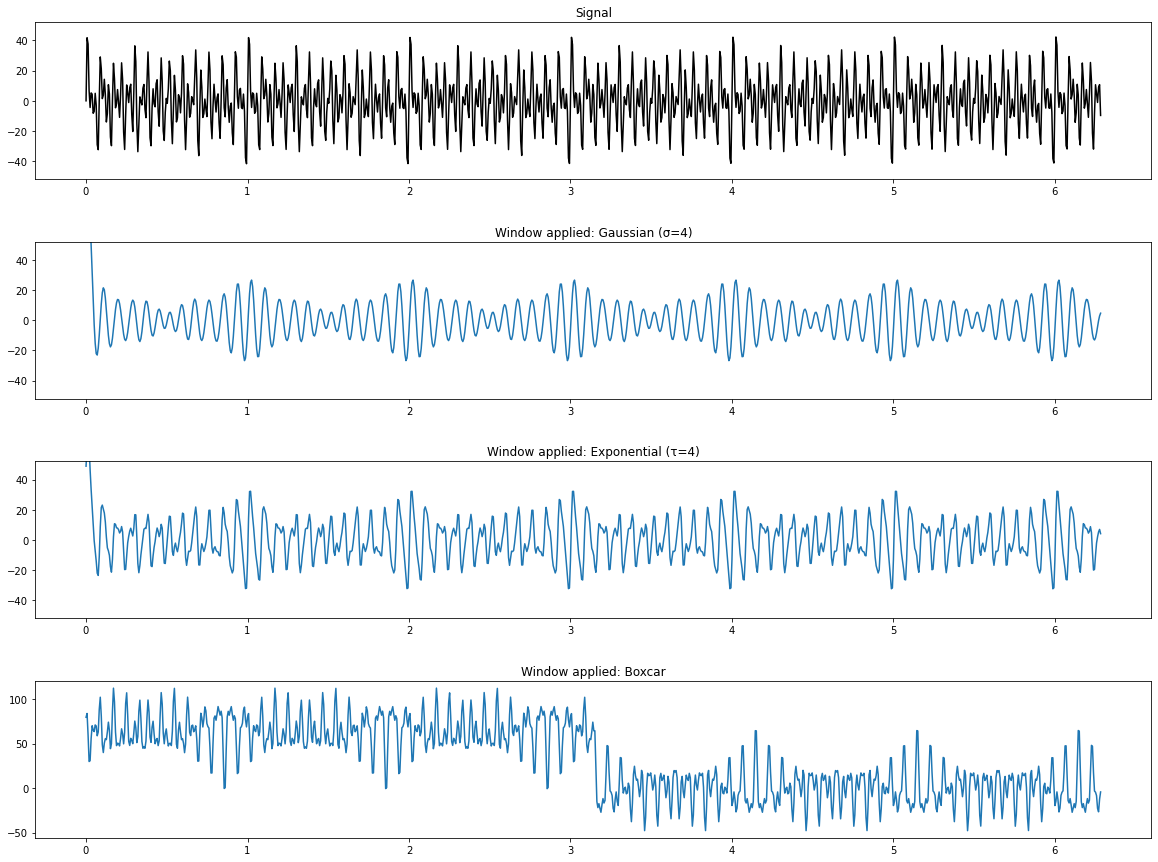

In [296]:
plt.figure(figsize=(20,15))

signal = y_funct
plt.subplot(4,1,1)
plt.plot(x,signal,color='black')
plt.ylim(-int(np.max(y_funct)+10), int(np.max(y_funct)+10))
plt.title('Signal')

#Gaussian window
win_gaus = scipy.signal.windows.gaussian(points, std=4)
filt_gaus = scipy.signal.convolve(signal, win_gaus, mode='same')
plt.subplot(4,1,2)
plt.plot(x,filt_gaus)
plt.ylim(-int(np.max(y_funct)+10), int(np.max(y_funct)+10))
plt.title("Window applied: Gaussian (\u03C3=4)")

#Exponential window
win_exp = scipy.signal.windows.exponential(points, tau=4)
filt_exp = scipy.signal.convolve(signal, win_exp, mode='same')
plt.subplot(4,1,3)
plt.plot(x,filt_exp)
plt.ylim(-int(np.max(y_funct)+10), int(np.max(y_funct)+10))
plt.title("Window applied: Exponential (\u03C4=4)")
plt.subplots_adjust(wspace=0.4, hspace=0.4)  

#Moving Average
win_av = scipy.signal.windows.boxcar(points)
filt_av = scipy.signal.convolve(signal, win_av, mode='same')
plt.subplot(4,1,4)
plt.plot(x,filt_av)
#plt.ylim(-int(np.max(y_funct)+10), int(np.max(y_funct)+10))
plt.title("Window applied: Boxcar")
plt.subplots_adjust(wspace=0.4, hspace=0.4)  

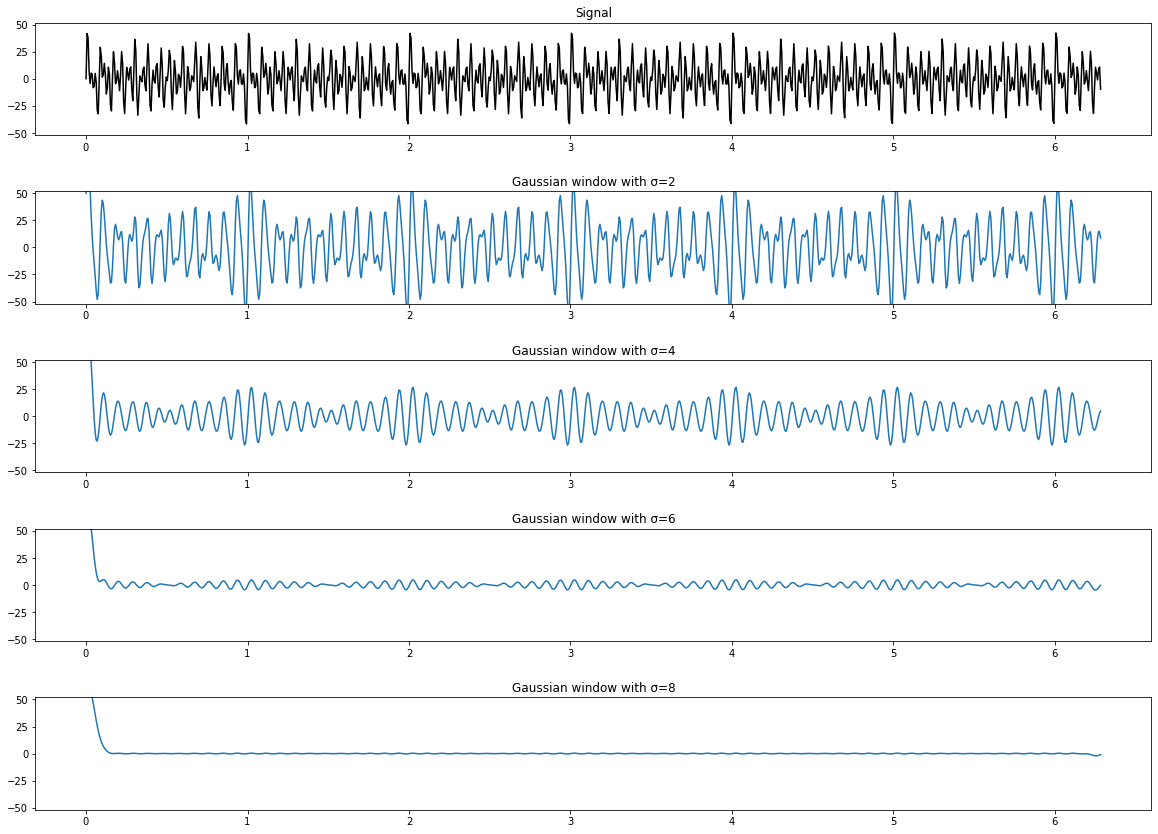

In [274]:
plt.figure(figsize=(20,30))

signal = y_funct
plt.subplot(10,1,1)
plt.plot(x,signal, color='black')
plt.ylim(-int(np.max(y_funct)+10), int(np.max(y_funct)+10))
plt.title('Signal')

plots=[2,3,4,5]

for n in range(2,9,2):
    window=scipy.signal.windows.gaussian(points, std=n)
    filt_gaus = scipy.signal.convolve(signal, window, mode='same')
    plt.subplot(10,1,plots[0])
    plt.plot(x,filt_gaus)
    plt.ylim(-int(np.max(y_funct)+10), int(np.max(y_funct)+10))
    plt.title("Gaussian window with \u03C3={}".format(n))
    plots.pop(0)

plt.subplots_adjust(wspace=0.4, hspace=0.5) 

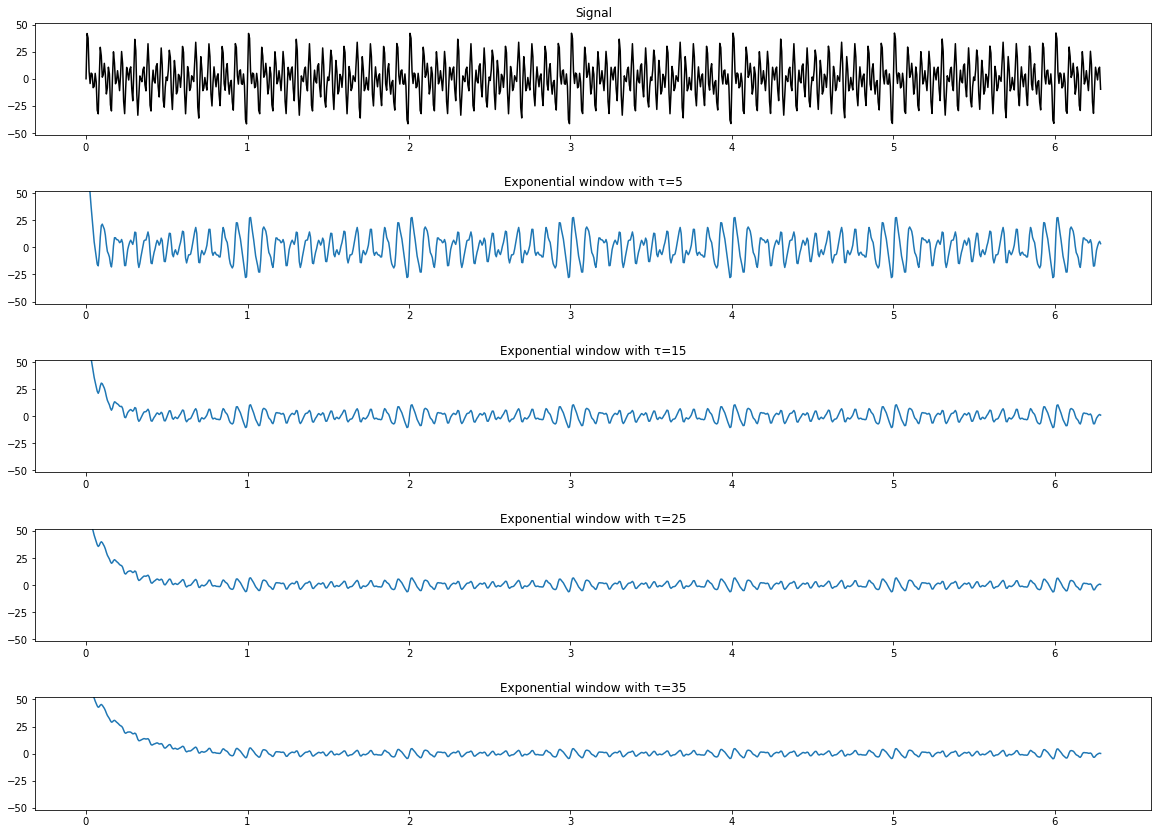

In [275]:
plt.figure(figsize=(20,30))

signal = y_funct
plt.subplot(10,1,1)
plt.plot(x,signal, color='black')
plt.ylim(-int(np.max(y_funct)+10), int(np.max(y_funct)+10))
plt.title('Signal')

plots=[2,3,4,5,6,7,8,9,10]

for n in range(5,45,10):
    window=scipy.signal.windows.exponential(points, tau=n)
    filt_gaus = scipy.signal.convolve(signal, window, mode='same')
    plt.subplot(10,1,plots[0])
    plt.plot(x,filt_gaus)
    plt.ylim(-int(np.max(y_funct)+10), int(np.max(y_funct)+10))
    plt.title("Exponential window with \u03C4={}".format(n))
    plots.pop(0)

plt.subplots_adjust(wspace=0.4, hspace=0.5) 